In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
linear = pd.read_csv("C:/Users/ammanana/Downloads/data_2_var.csv",names=['f1', 'y'])

In [3]:
linear

,f1,y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1106,-115.366669,121.000000
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885


In [4]:
linear.describe()

,f1,y
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


In [5]:
linear.shape

(1111, 2)

<AxesSubplot:xlabel='f1', ylabel='y'>

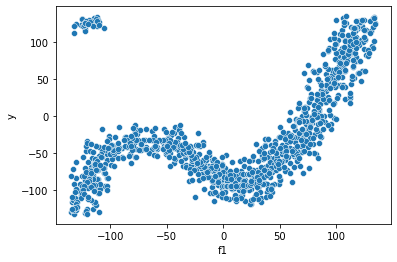

In [6]:
sns.scatterplot(data=linear, x='f1', y='y')

## REMOVAL OF OUTLIERS

<AxesSubplot:xlabel='f1'>

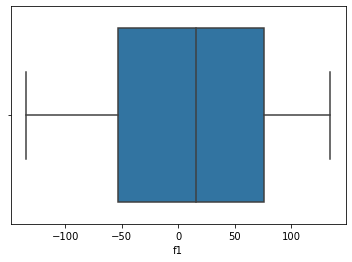

In [7]:
sns.boxplot(data=linear, x='f1')

<AxesSubplot:xlabel='y'>

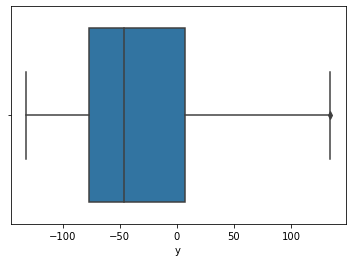

In [8]:
sns.boxplot(data=linear, x='y')

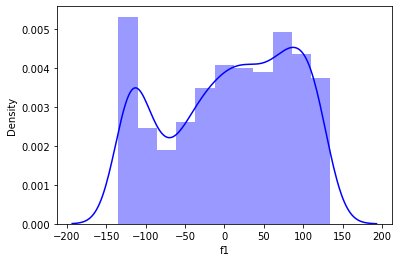

In [9]:
sns.distplot(linear.f1,kde=True,color='blue')
plt.show()

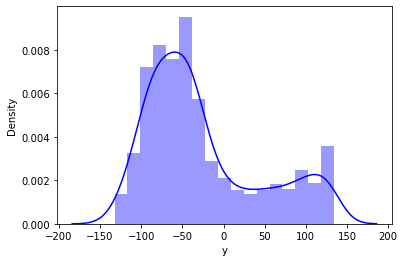

In [10]:
sns.distplot(linear.y,kde=True,color='blue')
plt.show()

In [11]:
outliers = linear[(linear['f1']<(-100)) & (linear['y']>100)].index
outliers

Int64Index([1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082,
            1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093,
            1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104,
            1105, 1106, 1107, 1108, 1109, 1110],
           dtype='int64')

In [12]:
linear.drop(index=(outliers),inplace=True,axis=0)

<AxesSubplot:xlabel='f1', ylabel='y'>

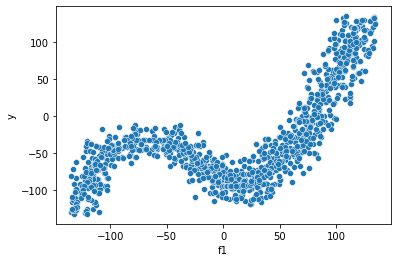

In [13]:
sns.scatterplot(data=linear, x='f1', y='y')

## MODEL TRAINING

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(linear[['f1']], linear['y'])

LinearRegression()

In [15]:
print(reg.coef_, reg.intercept_)

[0.56574686] -38.1724460402304


In [16]:
pred = reg.predict(linear[['f1']])

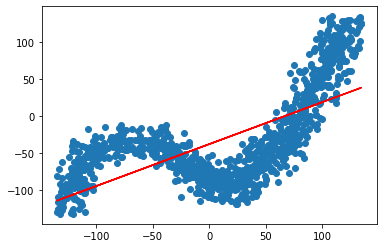

In [17]:
plt.scatter(linear['f1'], linear['y'])

plt.plot(linear['f1'], pred, 'r')

plt.show()


In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(linear[['f1']])
X_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
         5.15119325e+16, -6.32260898e+18,  7.76041246e+20],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
         4.75892172e+16, -5.78358512e+18,  7.02887309e+20],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
         1.09782697e+17, -1.48115542e+19,  1.99833074e+21],
       ...,
       [ 1.00000000e+00,  1.15862302e+02,  1.34240731e+04, ...,
         3.24741079e+16,  3.76252491e+18,  4.35934798e+20],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04, ...,
         3.60034673e+16,  4.22559012e+18,  4.95941452e+20],
       [ 1.00000000e+00,  9.96831410e+01,  9.93672860e+03, ...,
         9.74930625e+15,  9.71841470e+17,  9.68762103e+19]])

In [19]:
transformed_df = pd.DataFrame(X_poly, columns=['f1_0', 'f1_1', 'f1_2','f1_3','f1_4','f1_5','f1_6','f1_7','f1_8','f1_9','f1_10'])

transformed_df['y'] = linear['y']

transformed_df.head()

,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7,f1_8,f1_9,f1_10,y
0,1.0,-122.740667,15065.271434,-1.849121e+06,2.269624e+08,-2.785752e+10,3.419250e+12,-4.196811e+14,5.151193e+16,-6.322609e+18,7.760412e+20,-130.572085
1,1.0,-121.531419,14769.885901,-1.795005e+06,2.181495e+08,-2.651202e+10,3.222044e+12,-3.915795e+14,4.758922e+16,-5.783585e+18,7.028873e+20,-129.938929
2,1.0,-134.917019,18202.602016,-2.455841e+06,3.313347e+08,-4.470269e+10,6.031154e+12,-8.137053e+14,1.097827e+17,-1.481155e+19,1.998331e+21,-130.141832
3,1.0,-120.605951,14545.795441,-1.754309e+06,2.115802e+08,-2.551783e+10,3.077602e+12,-3.711771e+14,4.476617e+16,-5.399066e+18,6.511595e+20,-125.760932
4,1.0,-129.894781,16872.654053,-2.191670e+06,2.846865e+08,-3.697928e+10,4.803416e+12,-6.239387e+14,8.104638e+16,-1.052750e+19,1.367467e+21,-112.785214


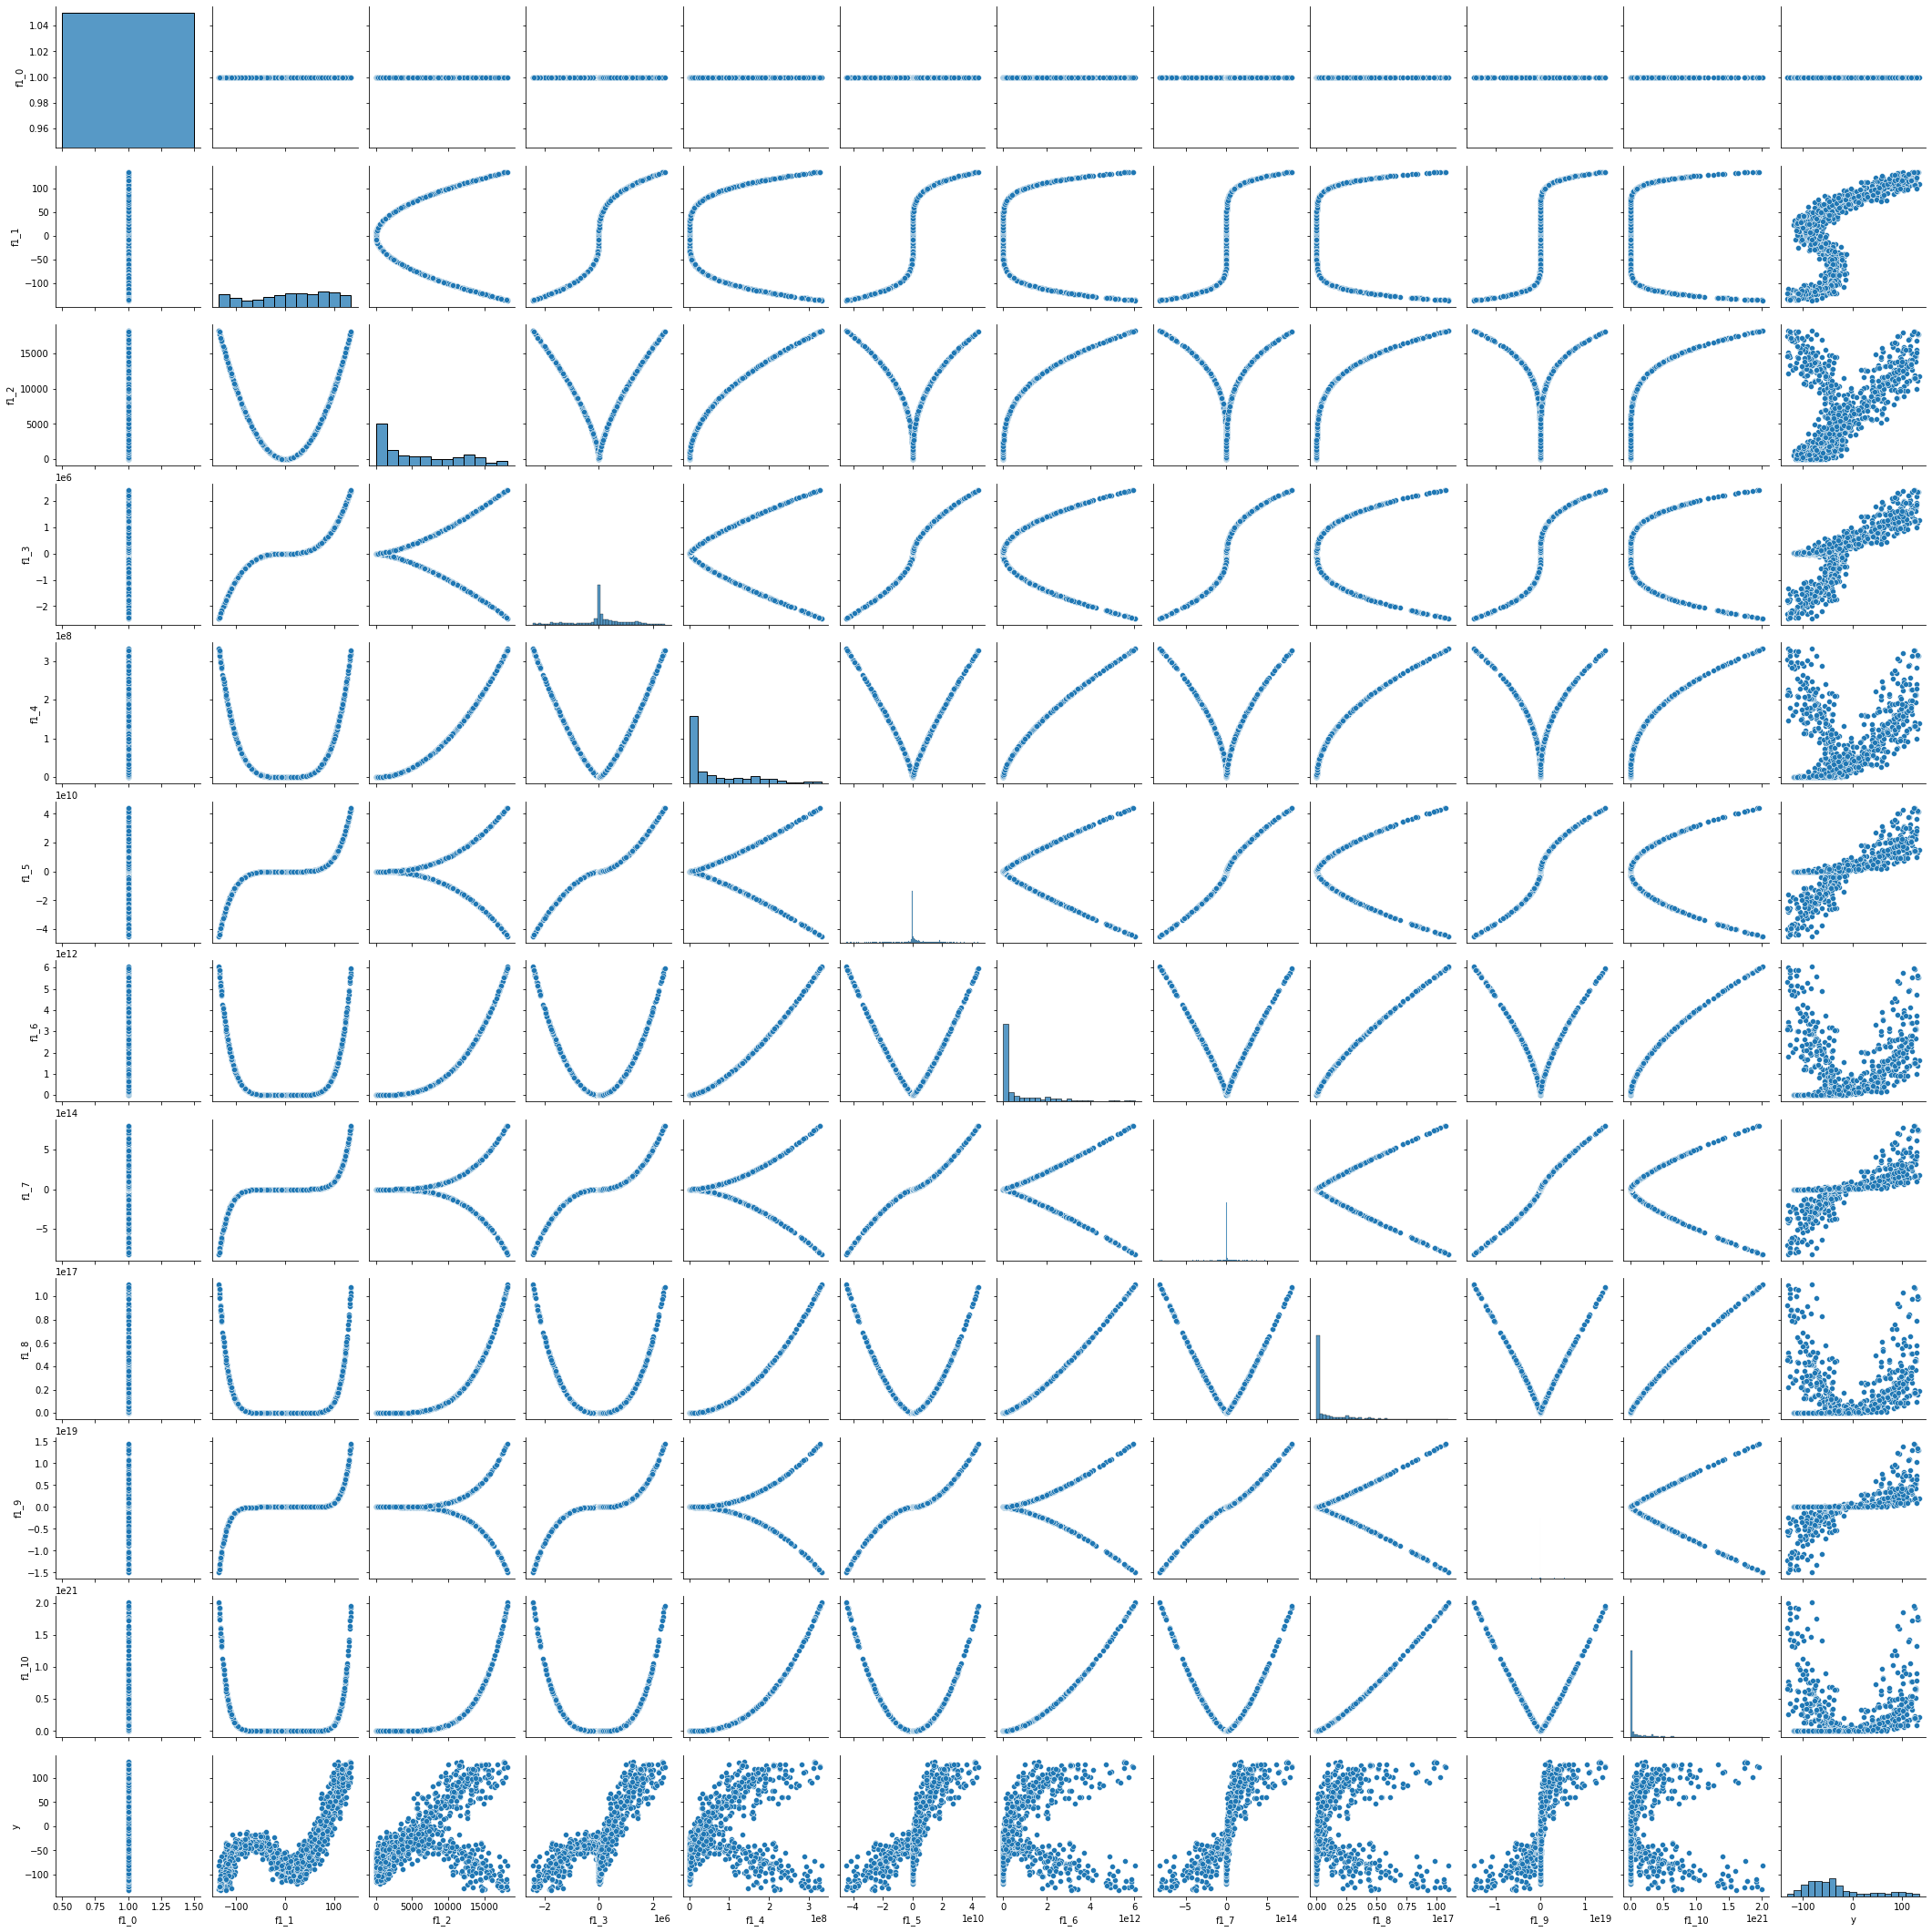

In [20]:
sns.pairplot(transformed_df)

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(transformed_df[['f1_5']], transformed_df['y'])

LinearRegression()

In [22]:
print(reg.coef_, reg.intercept_)

[3.63538732e-09] -32.42873631754422


In [23]:
pred = reg.predict(transformed_df[['f1_5']])

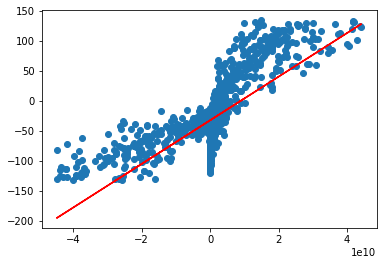

In [24]:
plt.scatter(transformed_df[['f1_5']], transformed_df['y'])

plt.plot(transformed_df[['f1_5']], pred, 'r')

plt.show()


In [25]:
X = transformed_df[['f1_0', 'f1_1', 'f1_2','f1_3','f1_4','f1_5']]

In [26]:
X

,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5
0,1.0,-122.740667,15065.271434,-1.849121e+06,2.269624e+08,-2.785752e+10
1,1.0,-121.531419,14769.885901,-1.795005e+06,2.181495e+08,-2.651202e+10
2,1.0,-134.917019,18202.602016,-2.455841e+06,3.313347e+08,-4.470269e+10
3,1.0,-120.605951,14545.795441,-1.754309e+06,2.115802e+08,-2.551783e+10
4,1.0,-129.894781,16872.654053,-2.191670e+06,2.846865e+08,-3.697928e+10
...,...,...,...,...,...,...
1067,1.0,134.605775,18118.714717,2.438884e+06,3.282878e+08,4.418944e+10
1068,1.0,116.633331,13603.333970,1.586602e+06,1.850507e+08,2.158308e+10
1069,1.0,115.862302,13424.073071,1.555344e+06,1.802057e+08,2.087905e+10
1070,1.0,117.366199,13774.824738,1.616699e+06,1.897458e+08,2.226974e+10


In [27]:
y = transformed_df['y']
y

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1067    123.619680
1068    118.000000
1069    118.564590
1070     99.544820
1071    129.272153
Name: y, Length: 1072, dtype: float64

In [28]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [29]:
X_train.head()

,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5
857,1.0,-120.069624,14416.714680,-1.731010e+06,2.078417e+08,-2.495547e+10
771,1.0,-85.366669,7287.468125,-6.221069e+05,5.310719e+07,-4.533584e+09
467,1.0,112.806778,12725.369072,1.435508e+06,1.619350e+08,1.826737e+10
455,1.0,103.303087,10671.527722,1.102402e+06,1.138815e+08,1.176431e+10
670,1.0,-29.959163,897.551436,-2.688989e+04,8.055986e+05,-2.413506e+07


In [30]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(750, 6) (750,)
(322, 6) (322,)


In [31]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_num_rescaled.head()

,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5
857,0.0,-1.671730,1.486152,-1.890430,1.596432,-1.871731
771,0.0,-1.228037,0.191720,-0.713340,-0.184870,-0.345670
467,0.0,1.305699,1.179060,1.470799,1.067955,1.358172
455,0.0,1.184190,0.806152,1.117210,0.514763,0.872219
670,0.0,-0.519627,-0.968473,-0.081523,-0.786966,-0.008693


In [32]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_num_rescaled = pd.DataFrame(scaler.fit_transform(X_test), 
                                    columns = X_test.columns, 
                                    index = X_test.index)

X_test_num_rescaled.head()

,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5
787,0.0,-1.554157,0.899340,-1.321222,0.589411,-0.943908
124,0.0,-0.728684,-0.760921,-0.172496,-0.695369,-0.046660
731,0.0,-0.821182,-0.645670,-0.219140,-0.666277,-0.057568
146,0.0,-0.739740,-0.748086,-0.177327,-0.692572,-0.047631
508,0.0,0.917845,0.177121,0.526551,-0.198111,0.253475


### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_num_rescaled, y_train)

LinearRegression()

In [34]:
y_train_pred = regressor.predict(X_train_num_rescaled)

In [35]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
857,-109.430178,-87.238401
771,-32.000000,-39.424705
467,119.593141,90.215705
455,87.081076,69.397710
670,-88.490318,-56.819513


In [36]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  16.15615999556163
Mean Squared Error:  463.4294083339839
Root Mean Squared Error:  21.52741062770866


In [37]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [38]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
787,-43.000000,-62.253198
124,-30.025125,-46.977426
731,-33.000000,-41.683120
146,-45.000000,-46.289056
508,58.861090,14.368697


In [39]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  16.740501657394944
Mean Squared Error:  516.2180526745001
Root Mean Squared Error:  22.720432493121695
